In [1]:
import numpy as np
import seaborn as sns
import requests
from urllib.parse import quote
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 시도 발생현황

In [2]:
key_fd = open('./key/Covid19key.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [3]:
# 데이터 생성일 시작범위/ 데이터 생성일 종료범위
start_date = '20201201'
end_date = '20201201'
page = 1

In [4]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [5]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
soup.find('resultCode').get_text() # 00이면 정상

'00'

In [6]:
# result = requests.get(url)
# soup = BeautifulSoup(result.text, 'xml')
# soup

In [7]:
# soup.find('resultCode').get_text() # 00이면 정상

In [8]:
soup.find('resultMsg').string

'NORMAL SERVICE.'

In [9]:
cosi = soup.find_all('item')
cosi

5</defCnt><gubun>충북</gubun><gubunCn>忠北</gubunCn><gubunEn>Chungcheongbuk-do</gubunEn><incDec>0</incDec><isolClearCnt>197</isolClearCnt><isolIngCnt>25</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>0</overFlowCnt><qurRate>14.07</qurRate><seq>5833</seq><stdDay>2020년 11월 23일 00시</stdDay><updateDt>null</updateDt></item>,
 <item><createDt>2020-11-23 09:33:42.565</createDt><deathCnt>6</deathCnt><defCnt>516</defCnt><gubun>강원</gubun><gubunCn>江原</gubunCn><gubunEn>Gangwon-do</gubunEn><incDec>12</incDec><isolClearCnt>306</isolClearCnt><isolIngCnt>204</isolIngCnt><localOccCnt>11</localOccCnt><overFlowCnt>1</overFlowCnt><qurRate>33.49</qurRate><seq>5832</seq><stdDay>2020년 11월 23일 00시</stdDay><updateDt>null</updateDt></item>,
 <item><createDt>2020-11-23 09:33:42.565</createDt><deathCnt>110</deathCnt><defCnt>6518</defCnt><gubun>경기</gubun><gubunCn>京畿</gubunCn><gubunEn>Gyeonggi-do</gubunEn><incDec>76</incDec><isolClearCnt>5544</isolClearCnt><isolIngCnt>864</isolIngCnt><localOccCnt>74</localOccCnt>

In [10]:
len(cosi)

230

In [11]:
dfcr = cosi[0].find('createDt').get_text()
dfcr

'2020-11-30 14:29:36.528'

In [12]:
dfgu = cosi[0].find('gubun').get_text()
dfin = cosi[0].find('incDec').get_text()
dfis = cosi[0].find('isolClearCnt').get_text()
dfqu = cosi[0].find('qurRate').get_text()
dfst = cosi[0].find('stdDay').get_text()
dfde = cosi[0].find('defCnt').get_text()
dfiic = cosi[0].find('isolIngCnt').get_text()
dfov = cosi[0].find('overFlowCnt').get_text()
dflo = cosi[0].find('localOccCnt').get_text()
print(f'시도명:{dfgu}, 전일대비증감:{dfin}, 격리해제수:{dfis}, 10만명당발생율:{dfqu}, 기준일시: {dfst}')
print(f'확진자수:{dfde}, 격리중환자수:{dfiic}, 해외유입수:{dfov}, 지역발생수:{dflo}')

시도명:검역, 전일대비증감:10, 격리해제수:1618, 10만명당발생율:-, 기준일시: 2020년 11월 30일 00시
확진자수:21301, 격리중환자수:512, 해외유입수:10, 지역발생수:0


In [13]:
dfcr_list = []; dfgu_list = []; dfin_list = []
dfis_list = []; dfqu_list = []; dfst_list = []
dfde_list =[]; dfiic_list = []; dfov_list = []; dflo_list = []
cosi = soup.find_all('item')

In [14]:
for co in cosi:
    dfcr = co.find('createDt').get_text()
    dfgu = co.find('gubun').get_text()
    dfin = co.find('incDec').get_text()
    dfis = co.find('isolClearCnt').get_text()
    dfqu = co.find('qurRate').get_text()
    dfst = co.find('stdDay').get_text()
    dfde = co.find('defCnt').get_text()
    dfiic = co.find('isolIngCnt').get_text()
    dfov = co.find('overFlowCnt').get_text()
    dflo = co.find('localOccCnt').get_text()
    print(dfcr,dfgu)

    dfcr_list.append(dfcr)
    dfgu_list.append(dfgu)
    dfin_list.append(dfin)
    dfis_list.append(dfis)
    dfqu_list.append(dfqu)
    dfst_list.append(dfst)
    dfde_list.append(dfde)
    dfiic_list.append(dfiic)
    dfov_list.append(dfov)
    dflo_list.append(dflo)

2020-11-30 14:29:36.528 검역
2020-11-30 14:29:36.528 검역
2020-11-30 14:29:36.528 제주
2020-11-30 14:29:36.527 경남
2020-11-30 14:29:36.527 경북
2020-11-30 14:29:36.527 전남
2020-11-30 14:29:36.527 전북
2020-11-30 14:29:36.527 충남
2020-11-30 14:29:36.527 충북
2020-11-30 14:29:36.527 강원
2020-11-30 14:29:36.526 경기
2020-11-30 14:29:36.526 세종
2020-11-30 14:29:36.526 울산
2020-11-30 14:29:36.526 대전
2020-11-30 14:29:36.526 광주
2020-11-30 14:29:36.526 인천
2020-11-30 14:29:36.525 대구
2020-11-30 14:29:36.525 부산
2020-11-30 14:29:36.525 서울
2020-11-30 14:29:36.525 합계
2020-11-30 14:29:36.525 합계
2020-11-29 14:14:46.518 검역
2020-11-29 14:14:46.518 제주
2020-11-29 14:14:46.518 경남
2020-11-29 14:14:46.518 경북
2020-11-29 14:14:46.518 전남
2020-11-29 14:14:46.518 전북
2020-11-29 14:14:46.518 충남
2020-11-29 14:14:46.517 충북
2020-11-29 14:14:46.517 강원
2020-11-29 14:14:46.517 경기
2020-11-29 14:14:46.517 세종
2020-11-29 14:14:46.517 울산
2020-11-29 14:14:46.517 대전
2020-11-29 14:14:46.517 광주
2020-11-29 14:14:46.516 인천
2020-11-29 14:14:46.516 대구
2

In [15]:
df = pd.DataFrame({
    '등록일시': dfcr_list,
    '시도명': dfgu_list,
    '전일대비증감수' : dfin_list,
    '격리해제수': dfis_list,
    '만명당발생율': dfqu_list,
    '기준일시': dfst_list,
    '확진자수': dfde_list,
    '격리중환자수': dfiic_list,
    '해외유입수': dfov_list,
    '지역발생수': dflo_list
})
df

,등록일시,시도명,전일대비증감수,격리해제수,만명당발생율,기준일시,확진자수,격리중환자수,해외유입수,지역발생수
0,2020-11-30 14:29:36.528,검역,10,1618,-,2020년 11월 30일 00시,21301,512,10,0
1,2020-11-30 14:29:36.528,검역,10,1618,-,2020년 11월 30일 00시,2130,512,10,0
2,2020-11-30 14:29:36.528,제주,1,60,11.93,2020년 11월 30일 00시,80,20,1,0
3,2020-11-30 14:29:36.527,경남,20,388,18.59,2020년 11월 30일 00시,625,236,1,19
4,2020-11-30 14:29:36.527,경북,4,1560,64.00,2020년 11월 30일 00시,1704,87,0,4
...,...,...,...,...,...,...,...,...,...,...
225,2020-11-21 09:44:25.225,인천,22,1051,39.88,2020년 11월 21일 00시,1179,117,0,22
226,2020-11-21 09:44:25.225,대구,1,6983,296.00,2020년 11월 21일 00시,7212,32,1,0
227,2020-11-21 09:44:25.225,부산,7,580,18.49,2020년 11월 21일 00시,631,36,0,7
228,2020-11-21 09:44:25.224,서울,156,6136,75.94,2020년 11월 21일 00시,7392,1171,2,154


In [16]:
# df.to_csv('./results/전국코로나원본.csv')

In [17]:
from tqdm import tqdm_notebook

In [21]:
from datetime import datetime, timedelta

In [25]:
start_date = '20200331'
end_date = '20201130'

In [26]:
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

print((end_date-start_date).days)

244


In [27]:
date = (end_date - datetime.timedelta(days=j)).strftime("%Y%m%d")
date

'20201119'

In [28]:
for j in range((end_date-start_date).days+1):
    da = (end_date - datetime.timedelta(days=j)).strftime("%Y%m%d")
    a_dict = {'일자':da, '서울':0, '부산':0, '대구':0, '인천':0,'대전':0, '광주':0, '울산':0, '세종':0, '경기':0,'강원':0, '충북':0,'충남':0, '경북':0, '경남':0,'전북':0,'전남':0,'제주':0}
    print(f'{a_dict}')
        # print(f'{a_dict}')

0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200724', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '경기': 0, '강원': 0, '충북': 0, '충남': 0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200723', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '경기': 0, '강원': 0, '충북': 0, '충남': 0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200722', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '경기': 0, '강원': 0, '충북': 0, '충남': 0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200721', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '경기': 0, '강원': 0, '충북': 0, '충남': 0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200720', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '경기': 0, '강원': 0, '충북': 0, '충남': 0, '경북': 0, '경남': 0, '전북': 0, '전남': 0, '제주': 0}
{'일자': '20200719', '서울': 0, '부산': 0, '대구': 0, '인천': 0, '대전': 0, '광주': 0, '울산': 0, '세종': 0, '

In [29]:
cosi_dict_list = []

for j in tqdm_notebook(range((end_date-start_date).days+1)):
    da = (end_date - datetime.timedelta(days=j)).strftime("%Y%m%d")
    a_dict = {'일자':da, '서울':0, '부산':0, '대구':0, '인천':0,'대전':0, '광주':0, '울산':0, '세종':0, '경기':0,'강원':0, '충북':0,'충남':0, '경북':0, '경남':0,'전북':0,'전남':0,'제주':0}
    page = 1
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={da}&endCreateDt={da}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    cosi = soup.find_all('item')
    for co in cosi:        
        area = co.find('gubun').get_text()
        number = co.find('incDec').get_text()
        a_dict[area] = number

    cosi_dict_list.append(a_dict)
dd = pd.DataFrame(cosi_dict_list)

In [30]:
dd

,일자,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,검역,합계
0,20201130,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,10,438
1,20201129,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,17,450
2,20201128,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,3,504
3,20201127,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,31,569
4,20201126,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,12,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,20200404,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,15,94
241,20200403,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,22,86
242,20200402,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,18,89
243,20200401,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,7,101


In [31]:
del dd['검역']
dd

,일자,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,20201130,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
1,20201129,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2,20201128,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504
3,20201127,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,569
4,20201126,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,20200404,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,94
241,20200403,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,86
242,20200402,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,89
243,20200401,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101


In [32]:
# dd.to_csv('./results/전국코로나.csv')

In [33]:
# nan값확인
dd.isnull().values.any()

False

In [34]:
cov = pd.DataFrame({'확진일': dd.일자, '서울': dd.서울, '부산':dd.부산, '대구':dd.대구,'인천':dd.인천,'대전':dd.대전,\
    '광주':dd.광주,'울산':dd.울산,'세종':dd.세종,'경기':dd.경기,'강원':dd.강원,'충북':dd.충북,'충남':dd.충남,'경북':dd.경북,\
        '경남':dd.경남,'전북':dd.전북,'전남':dd.전남,'제주':dd.제주,'합계':dd.합계})
cov

,확진일,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,20201130,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
1,20201129,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2,20201128,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504
3,20201127,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,569
4,20201126,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,20200404,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,94
241,20200403,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,86
242,20200402,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,89
243,20200401,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101


In [35]:
cov['확진일'] = pd.to_datetime(cov['확진일'] )
cov

,확진일,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
0,2020-11-30,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
1,2020-11-29,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2,2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504
3,2020-11-27,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,569
4,2020-11-26,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020-04-04,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,94
241,2020-04-03,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,86
242,2020-04-02,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,89
243,2020-04-01,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101


In [36]:
# 날짜 포맷팅
cov.set_index('확진일', inplace=True)
cov

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
2020-11-29,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504
2020-11-27,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,569
2020-11-26,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-04,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,94
2020-04-03,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,86
2020-04-02,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,89


In [37]:
cov = cov.astype('int')
cov

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
2020-11-29,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504
2020-11-27,204,24,0,25,5,13,7,3,117,9,20,31,3,39,24,11,3,569
2020-11-26,213,22,1,19,1,14,7,4,183,8,8,16,2,45,16,9,3,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-04,22,0,27,3,0,0,0,0,23,1,0,1,1,1,0,0,0,94
2020-04-03,18,0,9,1,0,1,0,0,23,2,1,1,5,1,1,1,0,86
2020-04-02,14,0,21,4,0,1,1,0,17,1,0,2,2,6,0,2,0,89


In [38]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2020-11-30 to 2020-03-31
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      245 non-null    int32
 1   부산      245 non-null    int32
 2   대구      245 non-null    int32
 3   인천      245 non-null    int32
 4   대전      245 non-null    int32
 5   광주      245 non-null    int32
 6   울산      245 non-null    int32
 7   세종      245 non-null    int32
 8   경기      245 non-null    int32
 9   강원      245 non-null    int32
 10  충북      245 non-null    int32
 11  충남      245 non-null    int32
 12  경북      245 non-null    int32
 13  경남      245 non-null    int32
 14  전북      245 non-null    int32
 15  전남      245 non-null    int32
 16  제주      245 non-null    int32
 17  합계      245 non-null    int32
dtypes: int32(18)
memory usage: 19.1 KB


In [39]:
# cov.to_csv('./results/전국코로나02.csv')

### 월별, 구별 확진자 수 구하기

In [40]:
cov_m = cov.resample('MS').first()
cov_m.head()

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-03-01,24,1,60,6,2,0,0,0,13,0,0,1,2,1,0,0,0,125
2020-04-01,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101
2020-05-01,1,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,9
2020-06-01,1,0,1,18,0,0,0,0,12,0,0,0,0,0,0,1,0,35
2020-07-01,9,0,1,2,4,12,0,0,16,0,0,1,0,0,0,1,0,51


In [41]:
# cov_m.to_csv('./results/전국코로나03.csv')

In [42]:
cov_m.index = ['3월','4월','5월','6월','7월','8월','9월','10월','11월']
cov_m

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
3월,24,1,60,6,2,0,0,0,13,0,0,1,2,1,0,0,0,125
4월,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101
5월,1,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,9
6월,1,0,1,18,0,0,0,0,12,0,0,0,0,0,0,1,0,35
7월,9,0,1,2,4,12,0,0,16,0,0,1,0,0,0,1,0,51
8월,2,1,0,1,0,0,0,0,7,0,0,0,1,0,0,0,0,31
9월,94,3,2,22,8,4,6,0,63,4,1,7,9,3,0,4,1,235
10월,30,6,1,3,0,0,0,0,21,0,1,3,5,0,0,1,0,77
11월,45,0,2,4,0,3,0,0,38,3,1,9,0,2,0,3,0,124


In [43]:
cov_m_T = cov_m.T
cov_m_T

,3월,4월,5월,6월,7월,8월,9월,10월,11월
서울,24,24,1,1,9,2,94,30,45
부산,1,3,0,0,0,1,3,6,0
대구,60,20,0,1,1,0,2,1,2
인천,6,5,1,18,2,1,22,3,4
대전,2,0,0,0,4,0,8,0,0
광주,0,4,0,0,12,0,4,0,3
울산,0,0,0,0,0,0,6,0,0
세종,0,0,0,0,0,0,0,0,0
경기,13,23,2,12,16,7,63,21,38
강원,0,2,0,0,0,0,4,0,3


In [44]:
# 가로로 계산할 경우 값이 소수로 나오기에 해당 숫자를 먼저 정수로 변경후 합계를 계산
cov_m_T['합계'] = cov_m_T.astype('int').sum(axis=1)
cov_m_T

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,24,24,1,1,9,2,94,30,45,230
부산,1,3,0,0,0,1,3,6,0,14
대구,60,20,0,1,1,0,2,1,2,87
인천,6,5,1,18,2,1,22,3,4,62
대전,2,0,0,0,4,0,8,0,0,14
광주,0,4,0,0,12,0,4,0,3,23
울산,0,0,0,0,0,0,6,0,0,6
세종,0,0,0,0,0,0,0,0,0,0
경기,13,23,2,12,16,7,63,21,38,195
강원,0,2,0,0,0,0,4,0,3,9


In [45]:
cov_m_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 서울 to 합계
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   3월      18 non-null     int32
 1   4월      18 non-null     int32
 2   5월      18 non-null     int32
 3   6월      18 non-null     int32
 4   7월      18 non-null     int32
 5   8월      18 non-null     int32
 6   9월      18 non-null     int32
 7   10월     18 non-null     int32
 8   11월     18 non-null     int32
 9   합계      18 non-null     int64
dtypes: int32(9), int64(1)
memory usage: 1.5+ KB


In [46]:
cov_m_T = cov_m_T.iloc[:-1, :]
cov_m_T

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,24,24,1,1,9,2,94,30,45,230
부산,1,3,0,0,0,1,3,6,0,14
대구,60,20,0,1,1,0,2,1,2,87
인천,6,5,1,18,2,1,22,3,4,62
대전,2,0,0,0,4,0,8,0,0,14
광주,0,4,0,0,12,0,4,0,3,23
울산,0,0,0,0,0,0,6,0,0,6
세종,0,0,0,0,0,0,0,0,0,0
경기,13,23,2,12,16,7,63,21,38,195
강원,0,2,0,0,0,0,4,0,3,9


In [47]:
# del cov_m_T['합계']

In [48]:
# cov_m_T.to_csv('./results/전국코로나03_T.csv')

### 서울시 인구현황 데이터

In [49]:
pop = pd.read_excel('./results/전국인구및소멸.xlsx')
pop.head()

,Unnamed: 0,광역시도,시군구,행정구,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,0,강릉,3,11,0.184431,-4.370979
1,1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,1,고성(강원),0,10,-0.518606,-7.588617
2,2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,1,동해,4,11,-0.177618,-3.957452
3,3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,1,삼척,5,11,-1.153915,-7.515288
4,4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,0,속초,1,10,0.868916,-3.471873


In [50]:
pop1 = pop[['광역시도','시군구','인구수합계']]
pop1.head()

,광역시도,시군구,인구수합계
0,강원,강릉시,203057
1,강원,고성군,23621
2,강원,동해시,83888
3,강원,삼척시,61833
4,강원,속초시,76302


In [76]:
pop1.set_index('광역시도', inplace=True)
pop1.head()

,시군구,인구수합계
광역시도,,
강원,강릉시,203057
강원,고성군,23621
강원,동해시,83888
강원,삼척시,61833
강원,속초시,76302


In [80]:
pop1_g = pop1.groupby('광역시도')[['인구수합계']].sum()
pop1_g.head()

,인구수합계
광역시도,
강원,1428480
경기,12437493
경남,3141767
경북,2477500
광주,1409750


In [86]:
pop1_g

,인구수합계
광역시도,
강원,1428480
경기,12437493
경남,3141767
경북,2477500
광주,1409750
대구,2332499
대전,1420059
부산,3222121
서울,9096901


In [85]:
# 코로나 현황과 인구데이터 합치기
# 옵션(axis값을 1로 주어 위아래가 아닌 좌우으로 합침)
pop_cov_m_T = pd.concat([cov_m_T, pop1_g], axis=1)
pop_cov_m_T.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng,합계1,인구수합계
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652,230.0,9096901
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068,14.0,3222121
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805,87.0,2332499
인천,6,5,1,18,2,1,22,3,4,62,인천시청,37.456004,126.705258,62.0,2799553
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청,36.350539,127.384835,14.0,1420059


In [88]:
pop_cov_m_T['만명당확진자수'] = pop_cov_m_T['합계'] / pop_cov_m_T['인구수합계'] * 10000
pop_cov_m_T.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng,합계1,인구수합계,만명당확진자수
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652,230.0,9096901,0.252833
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068,14.0,3222121,0.043450
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805,87.0,2332499,0.372991
인천,6,5,1,18,2,1,22,3,4,62,인천시청,37.456004,126.705258,62.0,2799553,0.221464
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청,36.350539,127.384835,14.0,1420059,0.098587


### 카카오맵 api로 주소 받아오기

In [51]:
from urllib.parse import urlparse

In [52]:
cov_m_T.head(3)

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,24,24,1,1,9,2,94,30,45,230
부산,1,3,0,0,0,1,3,6,0,14
대구,60,20,0,1,1,0,2,1,2,87


In [53]:
cov_m_T_i = []

for i in cov_m_T.index:
    if i in ['서울','인천','세종','제주']:
        cov_m_T_i.append(f'{i}시청')
    elif i in ['부산','대구','인천','대전','광주','울산','제주']:
        cov_m_T_i.append(f'{i}광역시청')
    elif i in ['세종','제주']:
        cov_m_T_i.append(f'{i}특별자치시청')
    elif i in ['제주']:
        cov_m_T_i.append(f'{i}특별자치도청')
    elif i in ['강원', '충북', '충남', '전북', '전남', '경북', '경남', '경기']:
        cov_m_T_i.append(f'{i}도청')

cov_m_T['시청'] = cov_m_T_i
cov_m_T.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청
서울,24,24,1,1,9,2,94,30,45,230,서울시청
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청
인천,6,5,1,18,2,1,22,3,4,62,인천시청
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청


In [54]:
key_fd = open('../06.reapi/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [55]:
addr = '충북도청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + addr
result = requests.get(urlparse(url).geturl(),
            headers={"Authorization": "KakaoAK "+ kmap_key}).json()
result['documents'][0]

{'address_name': '충북 청주시 상당구 문화동 89',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 지방행정기관 > 도청',
 'distance': '',
 'id': '12474840',
 'phone': '043-220-2114',
 'place_name': '충청북도청',
 'place_url': 'http://place.map.kakao.com/12474840',
 'road_address_name': '충북 청주시 상당구 상당로 82',
 'x': '127.491457326504',
 'y': '36.6353581960153'}

In [56]:
# 경도
result['documents'][0]['x']

'127.491457326504'

In [57]:
# 위도
result['documents'][0]['y']

'36.6353581960153'

In [58]:
# lat: 위도 lng: 경도
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])
lat, lng

(36.6353581960153, 127.491457326504)

### 위도 경도 추가

In [59]:
addr = '충북도청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + addr
result = requests.get(urlparse(url).geturl(),
            headers={"Authorization": "KakaoAK "+ kmap_key}).json()

In [60]:
#데이터 프레임은 index로 돌리는게 쉽다
lat_list = []; lng_list = []
for i in cov_m_T.index:
    addr = '충북도청'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + cov_m_T['시청'][i]
    result = requests.get(urlparse(url).geturl(),
                headers={"Authorization": "KakaoAK "+ kmap_key}).json()
    lat = float(result['documents'][0]['y'])
    lng = float(result['documents'][0]['x'])
    
    lat_list.append(lat)
    lng_list.append(lng)

In [61]:
cov_m_T['lat'] = lat_list
cov_m_T['lng'] = lng_list
cov_m_T

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805
인천,6,5,1,18,2,1,22,3,4,62,인천시청,37.456004,126.705258
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청,36.350539,127.384835
광주,0,4,0,0,12,0,4,0,3,23,광주광역시청,35.160102,126.851630
울산,0,0,0,0,0,0,6,0,0,6,울산광역시청,35.539479,129.311468
세종,0,0,0,0,0,0,0,0,0,0,세종시청,36.480063,127.289195
경기,13,23,2,12,16,7,63,21,38,195,경기도청,37.274977,127.008930
강원,0,2,0,0,0,0,4,0,3,9,강원도청,37.885326,127.729829


In [62]:
# cov_m_T.to_csv('./results/전국코로나_T경도추가.csv')

In [63]:
cov.head(3)

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
확진일,,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,5,13,3,1,77,8,22,5,4,20,16,4,1,438
2020-11-29,150,22,3,22,6,8,0,3,101,19,23,13,11,15,17,19,1,450
2020-11-28,178,28,1,25,13,16,3,0,126,33,24,17,5,14,9,7,2,504


In [64]:
cov_m.head(3)

,서울,부산,대구,인천,대전,광주,울산,세종,경기,강원,충북,충남,경북,경남,전북,전남,제주,합계
3월,24,1,60,6,2,0,0,0,13,0,0,1,2,1,0,0,0,125
4월,24,3,20,5,0,4,0,0,23,2,0,3,2,4,1,3,0,101
5월,1,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,9


In [65]:
cov_m_T.head(3)

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805


In [66]:
cov_m_T['합계1'] = cov_m_T['합계'].astype('float')
cov_m_T.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng,합계1
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652,230.0
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068,14.0
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805,87.0
인천,6,5,1,18,2,1,22,3,4,62,인천시청,37.456004,126.705258,62.0
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청,36.350539,127.384835,14.0


In [89]:
pop_cov_m_T.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,시청,lat,lng,합계1,인구수합계,만명당확진자수
서울,24,24,1,1,9,2,94,30,45,230,서울시청,37.566824,126.978652,230.0,9096901,0.252833
부산,1,3,0,0,0,1,3,6,0,14,부산광역시청,35.179737,129.075068,14.0,3222121,0.043450
대구,60,20,0,1,1,0,2,1,2,87,대구광역시청,35.871380,128.601805,87.0,2332499,0.372991
인천,6,5,1,18,2,1,22,3,4,62,인천시청,37.456004,126.705258,62.0,2799553,0.221464
대전,2,0,0,0,4,0,8,0,0,14,대전광역시청,36.350539,127.384835,14.0,1420059,0.098587


### 데이터 시각화

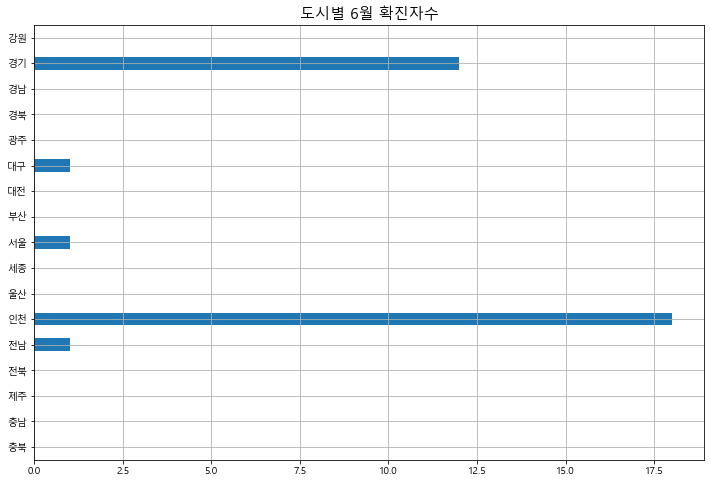

In [67]:
cov_m_T['6월'].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('도시별 6월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

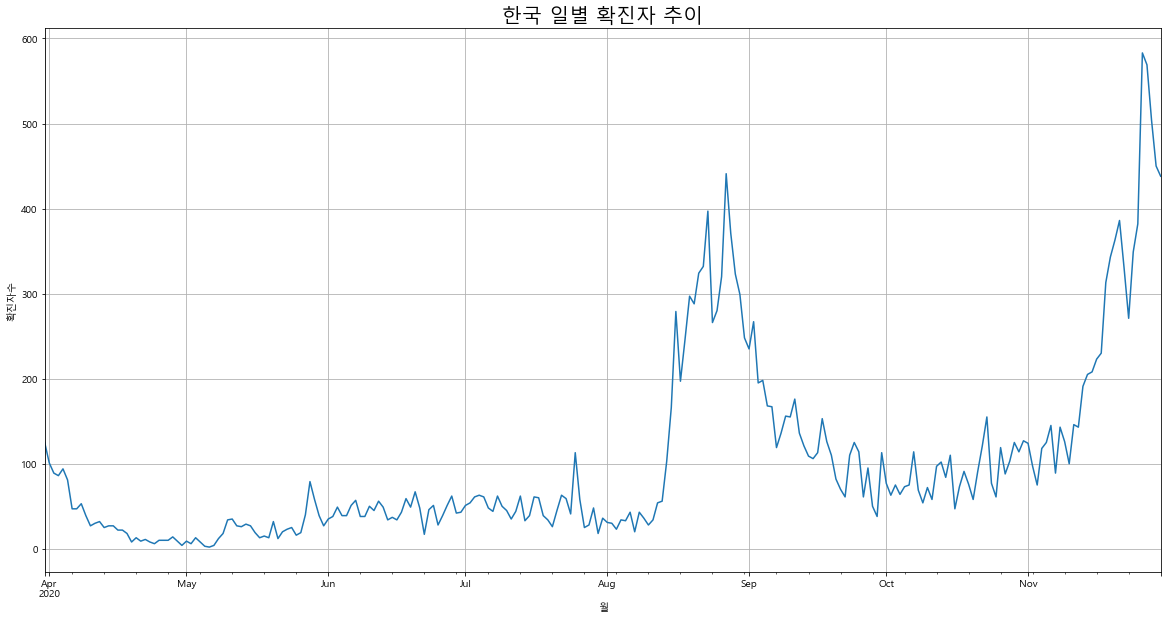

In [73]:
cov['합계'].plot(grid=True, figsize=(20,10))
plt.title('한국 일별 확진자 추이', fontsize=20)
plt.xlabel('월')
plt.ylabel('확진자수')
plt.show()

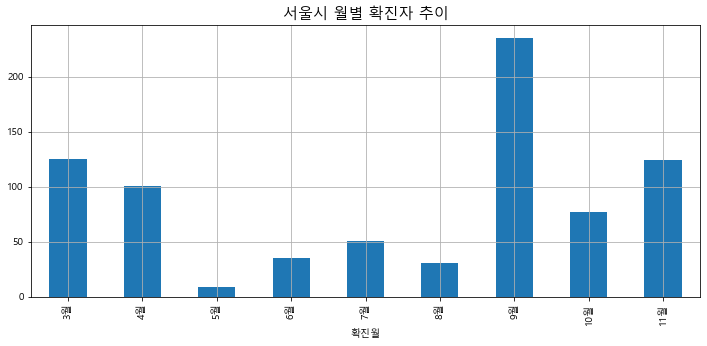

In [74]:
cov_m['합계'].plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('확진월')
plt.title('서울시 월별 확진자 추이', fontsize=15)
plt.show()

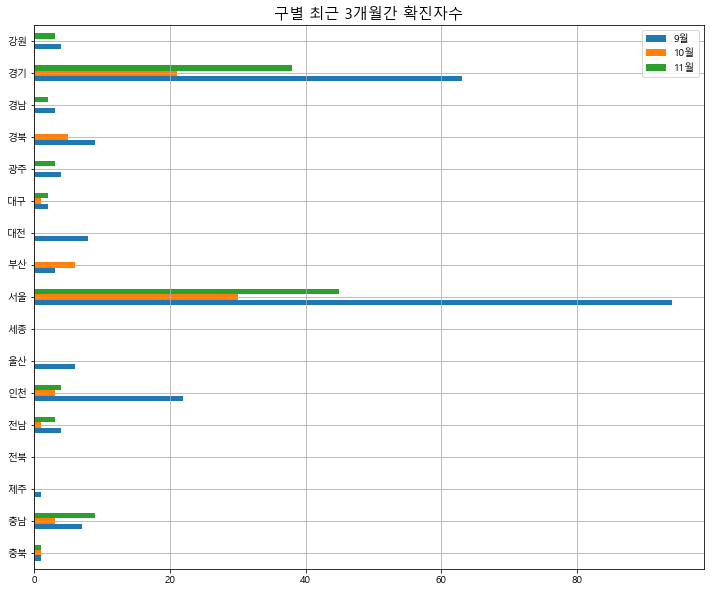

In [75]:
cov_m_T[['9월','10월','11월']].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,10))
plt.title('구별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

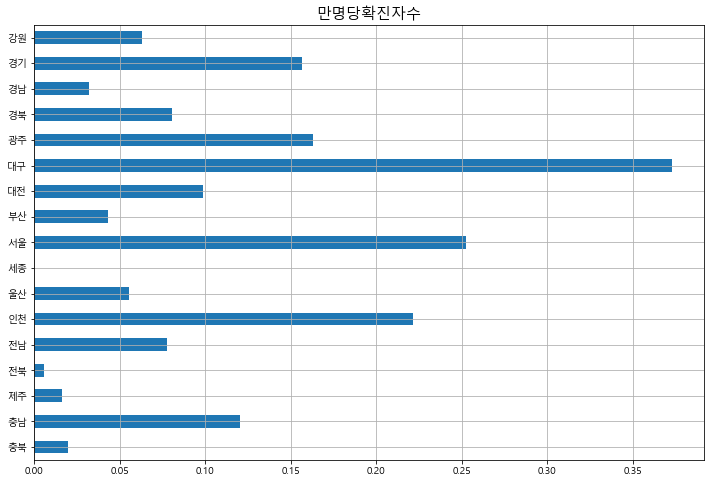

In [90]:
pop_cov_m_T['만명당확진자수'].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('만명당확진자수', fontsize=15)
plt.ylabel('')
plt.show()

In [68]:
import folium
import json
import googlemaps

In [69]:
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [92]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for i in cov_m_T.index:
    folium.CircleMarker(
        location = [cov_m_T.lat[i], cov_m_T.lng[i]],
        radius= cov_m_T.합계1[i] / 4,
        tooltip=i,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map1)

map1

In [103]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=9)

for i in pop_cov_m_T.index:
    folium.CircleMarker(
        location = [pop_cov_m_T.lat[i], pop_cov_m_T.lng[i]],
        radius= pop_cov_m_T.만명당확진자수[i] *100,
        tooltip=i,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map1)

map1